### K-means 알고리즘
- 데이터를 k개의 군집으로 묶는 알고리즘

### 유클리디안 거리를 기반으로 거리가 가까울수록 특성의 유사도가 높다.

In [19]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 
                                                'petal_length', 'petal_width'])

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 군집수(k) 값 정하기
- 군집을 추가로 늘려나가면서 군집내 변동성이 급감하는 군집개수가 적정함.
- 파란색 : 변동선
- 초록색 : 군집 학습 시간

### 변동성이 2에서 급감하고나서 변동성이 없는 3에서 군집수가 적정함.

In [21]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

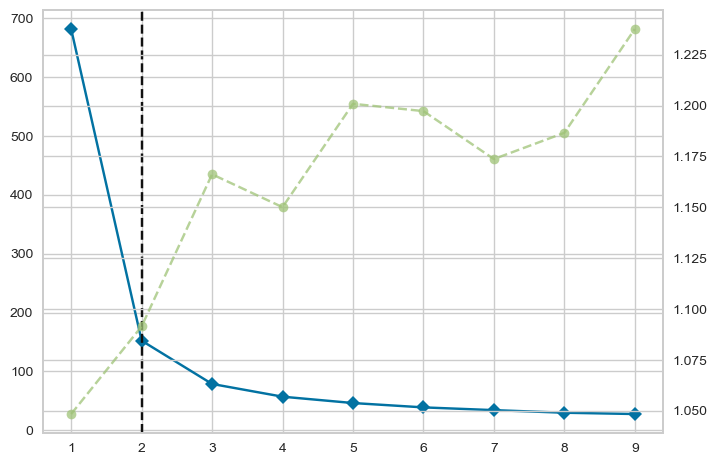

In [22]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(iris_df)

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)

In [24]:
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=42)

In [25]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

### 경고 무시
```
import warnings
warnings.filterwarnings('ignore')
```